In [15]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import sklearn

In [3]:
import IPython.display as ipd
# 播放音频文件
ipd.Audio('OSR_us_000_0010_8k.wav')

In [5]:
# 读取一段音频文件
# sr=None表示不设置采样率，默认会使用音频文件自身的采样率
# duration=3.5表示读取该文件前3.5秒的数据
# 读取文件后返回文件数据signal和采样率sample_rate
signal,sample_rate  = librosa.load('OSR_us_000_0010_8k.wav', sr=None, duration=3.5)
print('sample_rate:',sample_rate)
print('signal:',len(signal))

sample_rate: 8000
signal: 28000


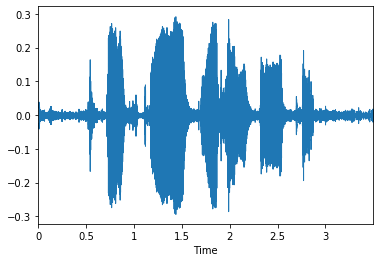

In [6]:
# 画出音频数据的波形图
librosa.display.waveplot(signal, sample_rate)
plt.show()

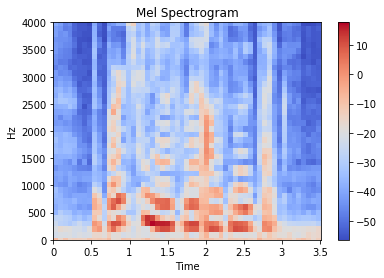

In [12]:
# 提取梅尔频谱特征
# n_fft为FFT窗口长度，hop_length为帧移，n_mels为滤波器个数
melspec = librosa.feature.melspectrogram(signal, sample_rate, n_fft=1024, hop_length=512, n_mels=40)
# 取对数
logmelspec = librosa.power_to_db(melspec)
# 画出梅尔频谱特征Mel Spectrogram
# fmax为最大频率
librosa.display.specshow(logmelspec, sr=sample_rate, fmax=4000, x_axis='time', y_axis='hz')
# 设置title
plt.title('Mel Spectrogram')
# 显示颜色数值
plt.colorbar()
plt.show()

/Users/qin/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/Users/qin/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_data.py:190: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


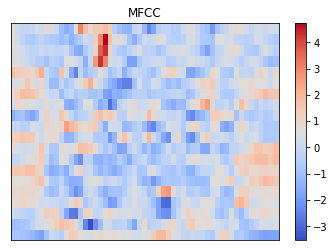

In [23]:
# 计算mfcc,n_mfcc为每帧数据mfcc特征数量
mfcc = librosa.feature.mfcc(signal,sample_rate,n_mfcc=20)
# 数据标准化
mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
# 画出mfcc频谱图
librosa.display.specshow(mfcc,sr=sample_rate)
plt.title('MFCC')
plt.colorbar()
plt.show()